In [13]:
import sys
from fastai.imports import*
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.dates as mdates


In [14]:
    #FUNÇÃO REPARTIR O DATASET EM TRAIN E TEST
    def split_vals(a,n):
        return a[:n].copy(), a[n:].copy()

In [15]:
    def forecast_accuracy(predictions, test_labels):
        forecast = predictions
        actual = test_labels
        #mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
        #me = np.mean(forecast - actual)             # ME
        mae = np.mean(np.abs(forecast - actual))    # MAE
        #mpe = np.mean((forecast - actual)/actual)   # MPE
        rmse = np.mean((forecast - actual)**2)**.5  # RMSE
        corr = np.corrcoef(forecast, actual)[0,1]   # corr
        #mins = np.amin(np.hstack([forecast[:,None], 
                                  #actual[:,None]]), axis=1)
        #maxs = np.amax(np.hstack([forecast[:,None], 
         #                         actual[:,None]]), axis=1)
        #minmax = 1 - np.mean(mins/maxs)             # minmax

        return(corr)

In [19]:
corr = 0
while corr < 0.32:

    dataset = pd.read_csv("DatasetCompletoDiario.csv",sep=";");
    dataset.columns = ['Data','PrecoDolar','QtdVendas','VolVarejo','FaturamentoIndust','IndsBebida','IndsMaquina','IndsMetal','IndsTextil','IndsTransf','IndsAlimen']
    dataset['Data']= pd.to_datetime(dataset['Data'],format='%Y/%m/%d')

    dataset['PrecoDolar'] = pd.to_numeric(dataset.PrecoDolar)
    dataset['QtdVendas'] = pd.to_numeric(dataset.QtdVendas)
    dataset['VolVarejo'] = pd.to_numeric(dataset.VolVarejo)
    dataset['FaturamentoIndust'] = pd.to_numeric(dataset.FaturamentoIndust)
    dataset['IndsBebida'] = pd.to_numeric(dataset.IndsBebida)
    dataset['IndsMaquina'] = pd.to_numeric(dataset.IndsMaquina)
    dataset['IndsMetal'] = pd.to_numeric(dataset.IndsMetal)
    dataset['IndsTextil'] = pd.to_numeric(dataset.IndsTextil)
    dataset['IndsTransf'] = pd.to_numeric(dataset.IndsTransf)
    dataset['IndsAlimen'] = pd.to_numeric(dataset.IndsAlimen)


    dataset= dataset.sort_values(['Data'])

    # CRIANDO  DATAFRAME

    range = dataset.Data
    df=pd.DataFrame(index = dataset.Data)

    dataset['PrecoDolar'].reset_index(drop=True, inplace=True)
    dataset['QtdVendas'].reset_index(drop=True, inplace=True)
    dataset['VolVarejo'].reset_index(drop=True, inplace=True)
    dataset['FaturamentoIndust'].reset_index(drop=True, inplace=True)
    dataset['IndsBebida'].reset_index(drop=True, inplace=True)
    dataset['IndsMaquina'].reset_index(drop=True, inplace=True)
    dataset['IndsMetal'].reset_index(drop=True, inplace=True)
    dataset['IndsTextil'].reset_index(drop=True, inplace=True)
    dataset['IndsTransf'].reset_index(drop=True, inplace=True)
    dataset['IndsAlimen'].reset_index(drop=True, inplace=True)

    df['PrecoDolar'] = dataset['PrecoDolar'].values
    df['QtdVendas'] = dataset['QtdVendas'].values
    df['VolVarejo'] = dataset['VolVarejo'].values
    df['FaturamentoIndust'] = dataset['FaturamentoIndust'].values
    df['IndsBebida'] = dataset['IndsBebida'].values
    df['IndsMaquina'] = dataset['IndsMaquina'].values
    df['IndsMetal'] = dataset['IndsMetal'].values
    df['IndsTextil'] = dataset['IndsTextil'].values
    df['IndsTransf'] = dataset['IndsTransf'].values
    df['IndsAlimen'] = dataset['IndsAlimen'].values
    ###################### Features com lag que mais influenciavel  #################################

    df['LAG 30 IndsMetal'] = dataset['IndsMetal'].values
    df['LAG 30 PrecoDolar'] = dataset['PrecoDolar'].values
    df['LAG 60 PrecoDolar'] = dataset['PrecoDolar'].values
    df['LAG 60 VolVarejo'] = dataset['VolVarejo'].values

    ###########################################

    df['LAG 30 IndsMetal'] = df['IndsMetal'].shift(30, axis=0)
    df['LAG 30 PrecoDolar'] = df['PrecoDolar'].shift(30, axis=0)
    df['LAG 60 PrecoDolar'] = df['PrecoDolar'].shift(60, axis=0)
    df['LAG 60 VolVarejo'] = df['VolVarejo'].shift(60, axis=0)

    ################## Substindo os NAN por ZERO #########################
    df['LAG 30 IndsMetal'].fillna(0, inplace=True)
    df['LAG 30 PrecoDolar'].fillna(0, inplace=True)
    df['LAG 60 PrecoDolar'].fillna(0, inplace=True)
    df['LAG 60 VolVarejo'].fillna(0, inplace=True)

    df_semVenda, y, nas = proc_df(df, 'QtdVendas')

    n_valid =  130                          #(20% do dataset para validação)
    n_trn = len(df_semVenda)-n_valid
    raw_train, raw_valid = split_vals(df,n_trn)
    train_features, test_features = split_vals(df_semVenda, n_trn)   ### train_features, test_features
    train_labels, test_labels = split_vals(y, n_trn)             ### train_labels, test_labels   ##test_features, test_labels

    train_features.shape, test_labels.shape, test_features.shape


    GridSearch_model = RandomForestRegressor(n_estimators = 10,min_samples_split=14,min_samples_leaf=12, max_features=8,max_depth=100)
    GridSearch_model.fit(train_features,train_labels)
    predOtimizada2 = GridSearch_model.predict(test_features)
    
    corr=forecast_accuracy(predOtimizada2, test_labels)
    #print(corr)  

In [20]:
corr

0.32145958130325575

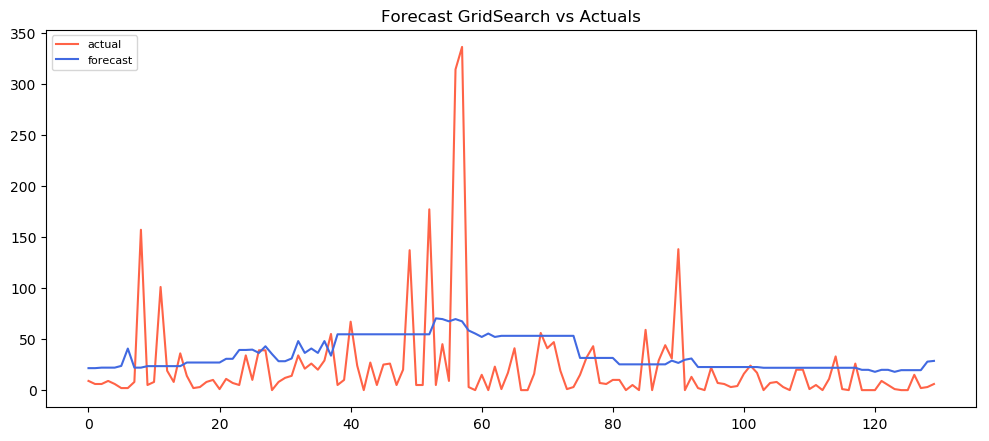

In [21]:
plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train_labels, label='training')
plt.plot(test_labels, label='actual', color='tomato')
plt.plot(predOtimizada2, label='forecast', color = 'royalblue')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast GridSearch vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [22]:
def forecast_accuracy(predictions, test_labels):
    forecast = predictions
    actual = test_labels
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(predOtimizada2, test_labels)

C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Anthony\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


{'mape': inf,
 'me': 11.529964412767669,
 'mae': 29.68804418830378,
 'mpe': inf,
 'rmse': 46.5359123388045,
 'corr': 0.32145958130325575,
 'minmax': 0.6622164426489812}

In [24]:
predOtimizada2.sum()  #4201

4531.895373659797